<a href="https://colab.research.google.com/github/hericax/Pos/blob/master/projeto_3/aed_projeto_3(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset

O conjunto de dados consiste em filmes lançados em ou antes de julho de 2017. Os pontos de dados incluem elenco, equipe, palavras-chave da trama, orçamento, receita, pôsteres, datas de lançamento, idiomas, empresas de produção, países, contagem de votos no TMDB e média de votos. 
O conjunto possui 6 arquivo, o que foi utilizado no trabalho é o movies_metadata.csv, que contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens. Este conjunto de dados também possui arquivos contendo 26 milhões de classificações, de 270.000 usuários para todos os 45.000 filmes. 

As classificações estão em uma escala de 1 a 5 e foram obtidas no site oficial do GroupLens.

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


Hipóteses: 

1 - Quais são os gêneros de filmes melhor avaliados? 

2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu? 

3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?


### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [1674]:
# BIBLIOTECAS
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [1675]:
# Leitura do dataset
filmes = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')

In [1676]:
# Pré-visaulização do dataset
filmes.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [1677]:
# tamanho da base
print('Número de linhas e número de colunas:', filmes.shape)

Número de linhas e número de colunas: (45466, 24)


In [1678]:
# fazendo uma cópia do dataset para ser trabalhado
df = filmes.copy()

In [1679]:
# tamanho da base
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (45466, 24)


In [1680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

# RENOMEANDO AS FEATURES

In [1681]:
df = df.rename(columns={'adult': "classificacao", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

# DESCRIÇÃO DAS FEATURES

'adulto' (booleano) - se o filme é exclusivo para adulto ou não . Contém dois valores: 'false' = 1, 'true' = 0

'despesas' (numérico) - possui o valor gasto na produção e divulgação dos vídeos 

'genero' (dicionário / texto) - contém qual ou quais são os gênceros de cada filme. Um filme pode ter um ou gêneros. Contém 29 valores possíveis. 

'id' (numérico) - número que identifica o filme 

'imdb_id'  (alfanumérico)- número unico que identifica o filme na base do imdb 

'lingua_original' (texto) - qual é o idioma original do filme produzido. Possui 90 valores possíveis.

'titulo_original' (texto) - titulo do filme 

'descricao' (texto) - descrição do filme 

'popularidade' (numérico)- qual é a popularidade do filme 

'cia_producao' (dicionário / texto) - qual(is) foi a companhia(s) que produziu o filme. Possui 19368 valores possíveis. Cada filme pode ter no mínimo um.

'pais_producao' (dicionário / texto) - quais foram os países onde os filmes foram gravados. Possui 155 valores possíveis. Cada filme pode ter no mínimo um.

'data_lancamento' (texto) - qual foi a data de lançamento do filme 

'receita'  (numérico) -  qual foi a receita obtida com o filme 

'duracao'  (numérico) - qual é a duração do filme em minutos 

'idiomas_falados' (dicionário/ texto) - quais são os idiomas que o filme possui tradução. Possui 73 valores possíveis.

'status' (texto) - status do filmes. Possui 7 valores possíveis: 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'

'slogan' (texto) - frase que define o filme. 

'titulo' (texto) - qual é o título do filme 

'video' (booleano) - se tem o video ou não do traile. Possui 3 valores possíveis: False, True, nan

'media_votos'  (numérico)- qual é a média de votos dada pelos usuários 

'qtde_votos'  (numérico)- qual foi a quantidade de votos

# EXCLUSÃO DE FEATURES COM DADOS RELEVANTES

In [1682]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
df.drop(['belongs_to_collection'],axis = 1, inplace = True)
df.drop(['homepage'],axis = 1, inplace = True)
df.drop(['poster_path'],axis = 1, inplace = True)     
df.drop(['tagline'],axis = 1, inplace = True)

#df.drop(['imdb_id'], inplace=True, axis=1)

In [1683]:
# tamanho da base
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (45466, 20)


# VERIFICANDO REGISTROS DUPLICADOS
Feaure que ID que será utilizada como chave

In [1684]:
# encontrando os registros duplicados
df_duplicado = df.groupby(['id']).size().reset_index(name='count')
df_duplicado.query('count > 1')

,id,count
941,105045,2
1872,10991,2
1880,109962,2
1972,110428,2
2107,11115,2
3577,119916,2
4449,12600,2
5287,13209,2
5347,132641,2
6615,141971,3


In [1685]:
# deletando
df.drop_duplicates(subset='id', keep='first', inplace = True)

In [1686]:
# validando
df_duplicado = df.groupby(['id']).size().reset_index(name='count')
df_duplicado.query('count > 1')

,id,count


# DESCRIÇÃO DAS FEATURES

A) Variáveis categóricas: adulto, genero , lingua_original, cia_producao, pais_producao, idiomas_falado, status, slogan, titulo, titulo_original, descricao, video

B) Variáveis discretas: despesas, id, data_lancamento, popularidade, receita, duracao(minutos), media_votos, qtde_votos  

In [1687]:
df.dtypes

classificacao       object
despesas            object
genero              object
id                  object
imdb_id             object
lingua_original     object
titulo_original     object
descricao           object
popularidade        object
cia_producao        object
pais_producao       object
data_lancamento     object
receita            float64
duracao            float64
idiomas_falados     object
status              object
titulo              object
video               object
media_votos        float64
qtde_votos         float64
dtype: object

# PRÉ-PROCESSANDO OS DADOS

## FEATURE CLASSIFICAÇÃO

In [1688]:
df.classificacao.unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [1689]:
df[(df.classificacao == ' - Written by Ørnås') | (df.classificacao == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.') | (df.classificacao == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.')]

,classificacao,despesas,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,receita,duracao,idiomas_falados,status,titulo,video,media_votos,qtde_votos
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1690]:
# DELETANDO OS TRÊS REGISTROS ACIMA QUE ESTÃO INVÁLIDOS
df.drop(19730, axis=0, inplace = True )
df.drop(29503, axis=0, inplace = True )
df.drop(35587, axis=0, inplace = True )

In [1691]:
# VALIDANDO A EXCLUSÃO DOS REGISTROS
df[(df.classificacao == ' - Written by Ørnås') | (df.classificacao == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.') | (df.classificacao == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.')]

,classificacao,despesas,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,receita,duracao,idiomas_falados,status,titulo,video,media_votos,qtde_votos


In [1692]:
df.classificacao.unique()

array(['False', 'True'], dtype=object)

In [1693]:
df.classificacao.value_counts()

False    45424
True         9
Name: classificacao, dtype: int64

Após a exclusão dos registros faltantes, os poucos filmes com classificação True, ou seja, somente para adultos, foram somente 9.
Portanto esta feature se tornou irrelevante e foi excluída.

In [1694]:
# exclusão da feature
df.drop(['classificacao'], inplace=True, axis=1)

# Validando a exclusão
df.columns

Index(['despesas', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos'],
      dtype='object')

## FEATURE DESPESAS

In [1695]:
df.despesas.describe()

count     45433
unique     1223
top           0
freq      36553
Name: despesas, dtype: object

In [1696]:
print ('Qtde de registros únicos: ', len(df.despesas.unique()))

Qtde de registros únicos:  1223


In [1697]:
df.despesas.value_counts()

0           36553
5000000       286
10000000      258
20000000      243
2000000       242
            ...  
3774400         1
1590000         1
2011799         1
5990000         1
46000           1
Name: despesas, Length: 1223, dtype: int64

Conforme observamos, dos 45463 registros da base, 36573 não possui valores de despesas, portanto a feature foi considerada irrelevante e excluída.

In [1698]:
# exclusão da feature
df.drop(['despesas'], inplace=True, axis=1)

# Validando a exclusão
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'receita', 'duracao', 'idiomas_falados', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos'],
      dtype='object')

## FEATURE GENERO

In [1699]:
df[["genero", "titulo_original"]].head(3)

,genero,titulo_original
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [1700]:
# Função para transformar a feature em uma lista de generos
from ast import literal_eval
df['genero'] = df['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):   
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #print ('names antes if len(names) > 1', names)
        tam = len(names)
        x = []
        if (tam > 1):
            t = 0
            #print ('entrei if')
            while t < tam:
                y = names[t]
                #print ('y', y)
                x.append(y)
                #print ('x', x)
                x.sort()
                #print ('x ordenado', x)
                t = t + 1
        if (tam == 1):            
            x.append(names[0])
            #print ('Unico genero', x)
        return x
        #print ('lista ordenada',x)
    return []
df['generos_ordenados'] = df['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros.

# VALIDANDO TRANSFORMAÇÃO
df[["generos_ordenados", "genero", "titulo_original"]].head(3)

,generos_ordenados,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Family, Fantasy]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Comedy, Romance]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [1701]:
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'receita', 'duracao', 'idiomas_falados', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'generos_ordenados'],
      dtype='object')

In [1702]:
df.generos_ordenados.value_counts()

[Drama]                                                  4996
[Comedy]                                                 3620
[Documentary]                                            2721
[]                                                       2442
[Comedy, Drama]                                          1664
                                                         ... 
[Action, Adventure, History, Horror]                        1
[Animation, Fantasy, Romance]                               1
[Documentary, Horror, Mystery]                              1
[Action, Adventure, Comedy, Crime, Mystery, Thriller]       1
[Adventure, Animation, Family, Mystery, Romance]            1
Name: generos_ordenados, Length: 1921, dtype: int64

# INICIO DE TESTE para excluir registros vazios

In [1703]:
df.generos_ordenados.value_counts()

[Drama]                                                  4996
[Comedy]                                                 3620
[Documentary]                                            2721
[]                                                       2442
[Comedy, Drama]                                          1664
                                                         ... 
[Action, Adventure, History, Horror]                        1
[Animation, Fantasy, Romance]                               1
[Documentary, Horror, Mystery]                              1
[Action, Adventure, Comedy, Crime, Mystery, Thriller]       1
[Adventure, Animation, Family, Mystery, Romance]            1
Name: generos_ordenados, Length: 1921, dtype: int64

In [1704]:
df.generos_ordenados.mode()[0]

['Drama']

In [1705]:
# substituindo o registros zerado
i = 0
id_zerados = []
novo_genero = df.generos_ordenados.mode()[0]
for index, row in df.iterrows():
    if len(row['generos_ordenados']) == 0:
        id_zerados.append(row['id'])
        df.ix[df.id==row['id'], ['generos_ordenados']] = [novo_genero]
        i = i + 1
print ("total = ", i)

total =  2442


In [1706]:
df.generos_ordenados.value_counts()

[Drama]                                       4996
[Comedy]                                      3620
[Documentary]                                 2721
Drama                                         2442
[Comedy, Drama]                               1664
                                              ... 
[Animation, Family, Fantasy, Horror]             1
[Comedy, Crime, Horror, Mystery, Thriller]       1
[Comedy, Music, Romance, TV Movie]               1
[Family, Horror]                                 1
[Animation, Fantasy, Horror, Thriller]           1
Name: generos_ordenados, Length: 1921, dtype: int64

# FIM DO TESTE

In [1707]:
df.generos_ordenados.value_counts()

[Drama]                                       4996
[Comedy]                                      3620
[Documentary]                                 2721
Drama                                         2442
[Comedy, Drama]                               1664
                                              ... 
[Animation, Family, Fantasy, Horror]             1
[Comedy, Crime, Horror, Mystery, Thriller]       1
[Comedy, Music, Romance, TV Movie]               1
[Family, Horror]                                 1
[Animation, Fantasy, Horror, Thriller]           1
Name: generos_ordenados, Length: 1921, dtype: int64

In [1708]:
# validando a transformação -> exemplos: "Thirst for Love" / "The Young and the Dead" /  "The Juche Idea"
df[['titulo','generos_ordenados']][df.titulo == 'Thirst for Love']

,titulo,generos_ordenados
19615,Thirst for Love,Drama


In [1709]:
'''
# Identificando e atualizando os filmes que não possuem gênero pela moda ( [] = 2442)
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['generos_ordenados'][t]) == 0):
        df.genero[t] = df.genero[t].fillna('Drama')
        z = z + 1
    t = t + 1
print ("total de registros sem gênero excluídos", z)
'''

'\n# Identificando e atualizando os filmes que não possuem gênero pela moda ( [] = 2442)\ntotal_registros = len(df)\nprint (\'total de registros\', total_registros)\nt = z = 0 \nwhile t < total_registros:\n    if (len(df[\'generos_ordenados\'][t]) == 0):\n        df.genero[t] = df.genero[t].fillna(\'Drama\')\n        z = z + 1\n    t = t + 1\nprint ("total de registros sem gênero excluídos", z)\n'

In [1710]:
print ('Qtde de gêneros únicos: ', len(df.generos_ordenados.value_counts()))

Qtde de gêneros únicos:  1921


In [1711]:
# Identificando os valores únicos dos gênero (da lista de gêneros)
df.generos_ordenados.value_counts().head(10)

[Drama]                     4996
[Comedy]                    3620
[Documentary]               2721
Drama                       2442
[Comedy, Drama]             1664
[Drama, Romance]            1643
[Comedy, Romance]           1143
[Comedy, Drama, Romance]    1031
[Horror]                     974
[Horror, Thriller]           680
Name: generos_ordenados, dtype: int64

Text(0.5, 1.0, 'Gêneros x média de votos')

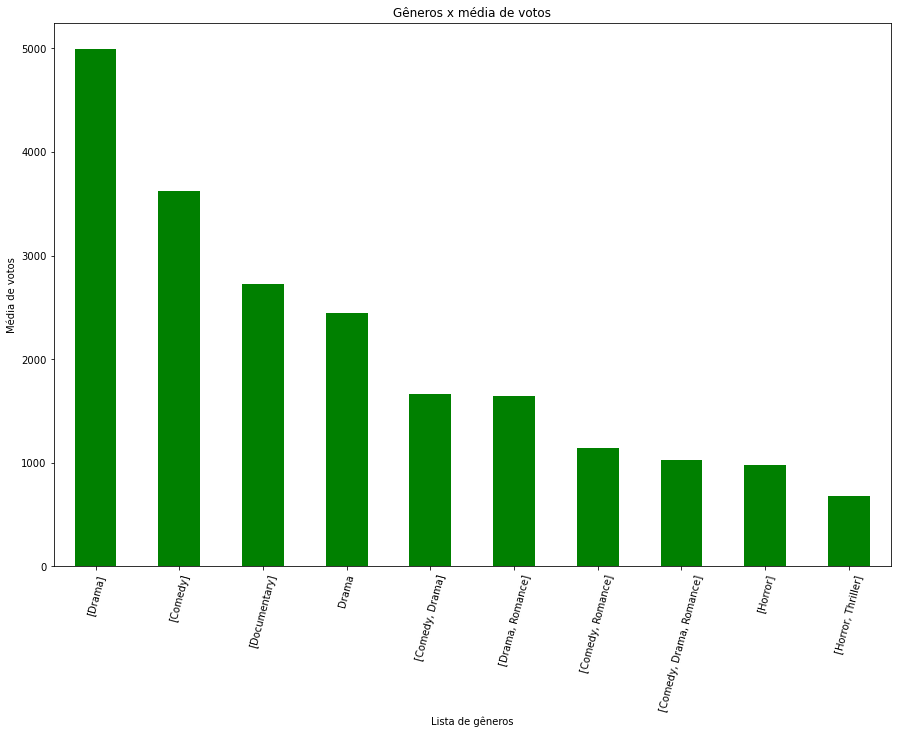

In [1712]:
# plotando os generos
df.generos_ordenados.value_counts().head(10).plot.bar(color='green')

plt.xticks(rotation=75)
plt.xlabel("Lista de gêneros")
plt.ylabel("Média de votos")
plt.title("Gêneros x média de votos")

### Abaixo, transformo os gêneros em features

In [1713]:
# resetando os índices
df = df.reset_index()

In [1714]:
df.columns

Index(['index', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados'],
      dtype='object')

In [1715]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(df.generos_ordenados)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x  = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = df.generos_ordenados[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = df.generos_ordenados[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            generos_unicos.sort()
            #print ("lista com os generos únicos ordenado", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  24
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'D', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'a', 'm', 'r']


In [1716]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(df.generos_ordenados).transform(df.generos_ordenados)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [1717]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo], axis=1)

In [1718]:
# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [1719]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
df.columns

Index(['index', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'D', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'a', 'm', 'r'],
      dtype='object')

In [1720]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
df = df.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})

In [1721]:
# contabilizando a qtde de registros true de cada gênero
lista_generos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(lista_generos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    genero = lista_generos[x]
    total_genero = sum(df[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)

total de generos 20
genero:  acao | 6592
genero:  aventura | 3490
genero:  animacao | 1931
genero:  comedia | 13176
genero:  crime | 4304
genero:  documentario | 3930
genero:  drama | 20244
genero:  familia | 2767
genero:  fantasia | 2309
genero:  estrangeiro | 1619
genero:  historia | 1398
genero:  horror | 4671
genero:  musical | 1597
genero:  misterio | 2464
genero:  romance | 6730
genero:  ficcao_cientifica | 3044
genero:  filmes_tv | 766
genero:  suspense | 7619
genero:  gerra | 1322
genero:  ocidental | 1042


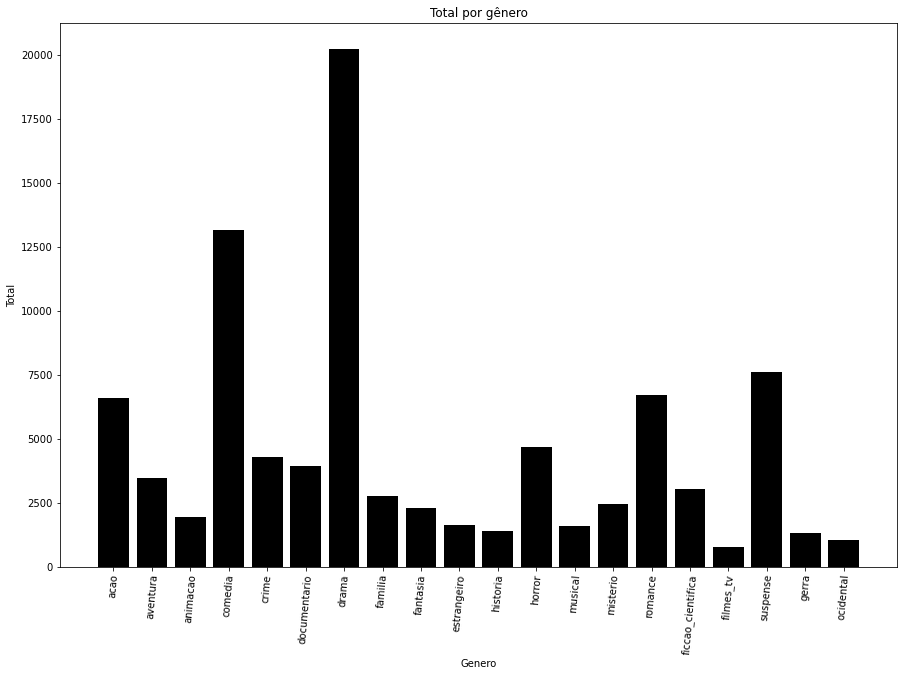

In [1722]:
#plotando os totais por generos
plt.bar(lista_generos, lista_totais,color = 'black')

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=85)

plt.xlabel("Genero")
plt.ylabel("Total")
plt.title("Total por gênero")

plt.show()

Conforme observamos, tanto na lista de gêneros únicos e os gêneros separadamente, o mais frequente é o drama, ou seja, a maior parte dos filmes disponível na base tem classificação "Drama" 

## FEATURE LINGUA ORIGINAL

In [1723]:
df.lingua_original.head(3)

0    en
1    en
2    en
Name: lingua_original, dtype: object

In [1724]:
df.lingua_original.describe()

count     45422
unique       89
top          en
freq      32251
Name: lingua_original, dtype: object

In [1725]:
df.lingua_original.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

### Identificando registros nulos e nan de lingua original

In [1726]:
# identificando a qtde de registros com lingua_original = nan
len(df[df.lingua_original.isna()])

11

In [1727]:
# identificando os registros com lingua_original = nan
df[['titulo','lingua_original']][df.lingua_original.isna()]

,titulo,lingua_original
19566,Shadowing the Third Man,NaN
21589,Unfinished Sky,NaN
22817,13 Fighting Men,NaN
32118,Lambchops,NaN
37380,Prince Bayaya,NaN
41017,Song of Lahore,NaN
41842,Annabelle Serpentine Dance,NaN
44027,Lettre d'une inconnue,NaN
44380,Yarn,NaN
44546,WiNWiN,NaN


In [1728]:
# resultado da moda
df.lingua_original.mode()[0]

'en'

In [1729]:
# atualizando pela moda
df.lingua_original = df.lingua_original.fillna('en')

In [1730]:
# validando a substituição os registros com lingua_original = nan
df[df.lingua_original.isnull()]

,index,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,...,misterio,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,a,m,r


CONVERTENDO A SIGLA DO IDIOMA NO NOME DO IDIOMA

In [1731]:
# Convertando a sigla do idioma no nome do idioma

sigla_lingua = df.lingua_original.sort_values().unique()
sigla_lingua

array(['ab', 'af', 'am', 'ar', 'ay', 'bg', 'bm', 'bn', 'bo', 'bs', 'ca',
       'cn', 'cs', 'cy', 'da', 'de', 'el', 'en', 'eo', 'es', 'et', 'eu',
       'fa', 'fi', 'fr', 'fy', 'gl', 'he', 'hi', 'hr', 'hu', 'hy', 'id',
       'is', 'it', 'iu', 'ja', 'jv', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky',
       'la', 'lb', 'lo', 'lt', 'lv', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt',
       'nb', 'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru',
       'rw', 'sh', 'si', 'sk', 'sl', 'sm', 'sq', 'sr', 'sv', 'ta', 'te',
       'tg', 'th', 'tl', 'tr', 'uk', 'ur', 'uz', 'vi', 'wo', 'xx', 'zh',
       'zu'], dtype=object)

In [1732]:
# Convertando a sigla do idioma no nome do idioma, usando o padrão ISO 639 (https://omegat.sourceforge.io/manual-latest/pt_BR/appendix.languages.html). 

df['lingua'] = df['lingua_original'].map({
    '': 'No Language', ' ': 'No Language',
    'xx':'No Language',    'en': 'Inglês',     'fr': 'Francês', 
    'zh': 'Chines',    'it': 'Italiano' ,     'fa': 'Persa', 
    'nl': 'Neerlandês',     'de': 'Alemão',     'cn': 'Mandarim padrão', 
    'ar': 'Argentino',     'es' : 'Espanhol',     'ru': 'Russo',
    'sv': 'Espanhol',     'ja': 'Japonês',     'ko': 'Coreano', 
    'sr': 'Sérvio',     'bn': 'Bengali',     'he': 'Hebraico', 
    'pt': 'Português',     'wo': 'Wolof',     'ro': 'Romeno', 
    'cy': 'Galês',     'vi': 'Vietnamita',       'cs':'hrv' , 
       'da': 'Dinamarquês',        'no': 'Norueguês',        'nb': 'Bokmål norueguês', 
       'pl': 'Polonês',        'el': 'Grego, Moderno',        'sh': 'Shan', 
       'mk': 'Macedônio',        'bo': 'Tibetano',        'ca': 'Catalão',
       'fi': 'Finlandês',        'th': 'Tailandês',        'sk': 'Eslovaco', 
       'hu': 'Húngaro',        'bs': 'Bósnio',        'hi': 'Hindi', 
       'tr': 'Turco',        'is': 'Islandês',        'ps': 'Pachto', 
       'ab': 'Abecásio',        'eo': 'Esperanto',       'ka': 'Georgiano', 
       'mn': 'Mongol',        'bm': 'Bambara',        'zu': 'Zulu', 
       'uk': 'Ucraniano',        'af': 'Africâner',        'la': 'Latim', 
       'et': 'Estoniano',        'ku': 'Curdo',        'fy': 'Frísio ocidental', 
       'lv': 'Letão',       'ta': 'Tâmil',        'sl': 'Esloveno', 
       'tl': 'Tagalog',        'ur': 'Urdu',        'rw': 'Kinyarwanda', 
       'id': 'Indonésio',        'bg': 'Búlgaro', 
       'mr': 'Marathi (Marāṭhī)', 'lt': 'Lituano', 'kk': 'Cazaque', 'ms': 'Malaio',
       'sq': 'Albanês', 
       'qu': 'Quechua', 'te': 'Telugu', 'am': 'Amárico', 
       'jv': 'Javanês', 'tg': 'Tajique', 'ml': 'Malayalam', 
       'hr': 'Croata', 'lo': 'Lao', 'ay': 'Aymará',
       'kn': 'Canarês', 
       'eu': 'Basco', 'ne': 'Nepali', 'pa': 'Panjabi, Punjabi', 
       'ky': 'Quirguiz, Kyrgyz', 'gl': 'Galego', 'uz': 'Uzbeque', 
       'sm': 'Samoano', 'mt': 'Maltês', 'hy': 'Armênio', 
       'iu': 'Inuktitut', 'lb': 'Luxemburguês, Letzeburgesch', 'si': 'Sinhala, Cingalês'
       })

In [1733]:
# validando a transformação
df[['lingua','lingua_original','titulo']][27:32]

,lingua,lingua_original,titulo
27,Inglês,en,Persuasion
28,Francês,fr,The City of Lost Children
29,Chines,zh,Shanghai Triad
30,Inglês,en,Dangerous Minds
31,Inglês,en,Twelve Monkeys


In [1734]:
# verificando se há registros nulos ou vazios
df['lingua'].unique()

array(['Inglês', 'Francês', 'Chines', 'Italiano', 'Persa', 'Neerlandês',
       'Alemão', 'Mandarim padrão', 'Argentino', 'Espanhol', 'Russo',
       'Japonês', 'Coreano', 'Sérvio', 'Bengali', 'Hebraico', 'Português',
       'Wolof', 'Romeno', 'Húngaro', 'Galês', 'Vietnamita', 'hrv',
       'Dinamarquês', 'Norueguês', 'Bokmål norueguês', 'Polonês',
       'Grego, Moderno', 'Shan', 'No Language', 'Macedônio', 'Tibetano',
       'Catalão', 'Finlandês', 'Tailandês', 'Eslovaco', 'Bósnio', 'Hindi',
       'Turco', 'Islandês', 'Pachto', 'Abecásio', 'Esperanto',
       'Georgiano', 'Mongol', 'Bambara', 'Zulu', 'Ucraniano', 'Africâner',
       'Latim', 'Estoniano', 'Curdo', 'Frísio ocidental', 'Letão',
       'Tâmil', 'Esloveno', 'Tagalog', 'Urdu', 'Kinyarwanda', 'Indonésio',
       'Búlgaro', 'Marathi (Marāṭhī)', 'Lituano', 'Cazaque', 'Malaio',
       'Albanês', 'Quechua', 'Telugu', 'Amárico', 'Javanês', 'Tajique',
       'Malayalam', 'Croata', 'Lao', 'Aymará', 'Canarês', 'Basco',
       'Nep

In [1735]:
print ('Qtde de registros:', len(df.lingua.unique()))

Qtde de registros: 88


In [1736]:
df.lingua.value_counts().sort_values(ascending = False).head(10)

Inglês      32262
Francês      2436
Italiano     1529
Espanhol     1377
Japonês      1347
Alemão       1079
Russo         826
Hindi         508
Coreano       444
Chines        409
Name: lingua, dtype: int64

Text(0.5, 1.0, 'Total por idioma falado - os 10 mais frequentes')

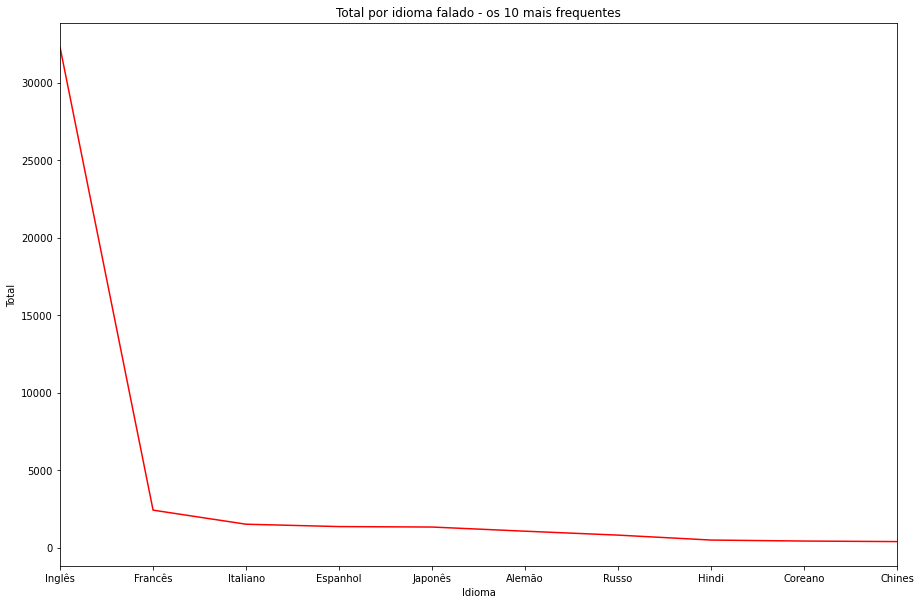

In [1737]:
df.lingua.value_counts().sort_values(ascending = False).head(10).plot(color = "red")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=0)

plt.xlabel("Idioma")
plt.ylabel("Total")
plt.title("Total por idioma falado - os 10 mais frequentes")

### FEATURE POPULARIDADE

In [1738]:
df.popularidade.head(3)

0    21.9469
1    17.0155
2    11.7129
Name: popularidade, dtype: object

In [1739]:
df.popularidade.describe()

count     45430
unique    44158
top         0.0
freq         34
Name: popularidade, dtype: object

In [1740]:
df.popularidade.unique()

array([21.946943, 17.015539, 11.7129, ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [1741]:
print ('Total de registros únicos de populariade:', len(df.popularidade.unique()))

Total de registros únicos de populariade: 44159


In [1742]:
# convertendo a featue para float
df.popularidade = df.popularidade.astype('float64')

In [1743]:
df.popularidade.value_counts().sort_values(ascending = False).head(10)

0.000000    66
0.000001    56
0.000308    43
0.000220    40
0.002001    28
0.000844    26
0.000578    25
0.001177    22
0.003013    21
0.001393    19
Name: popularidade, dtype: int64

Text(0.5, 1.0, 'Total por popularidade - os 10 mais frequentes')

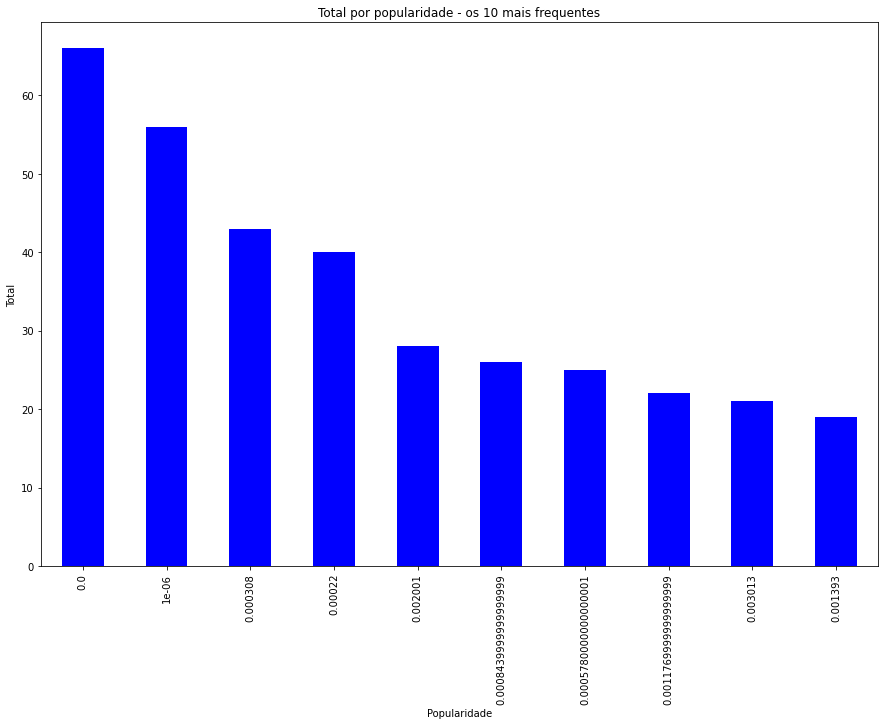

In [1744]:
df.popularidade.value_counts().sort_values(ascending = False).head(10).plot.bar(color = "blue")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("Popularidade")
plt.ylabel("Total")
plt.title("Total por popularidade - os 10 mais frequentes")

Devido à definição e entendimento da feature não estar claro, não será utilizado no trabalho

# FEATURE COMPANHIA DE PRODUÇÃO (CIA_PRODUCAO)

In [1745]:
df.cia_producao.head(3)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
Name: cia_producao, dtype: object

In [1746]:
df.cia_producao.describe()

count     45430
unique    22707
top          []
freq      11868
Name: cia_producao, dtype: object

In [1747]:
print ('Qtde de registros sem cia_producao: ', df.cia_producao.isnull().sum())

Qtde de registros sem cia_producao:  3


In [1748]:
# deletando os registros em branco
df = df.dropna(subset=['cia_producao'])

In [1749]:
# validando exclusão
print ('Qtde de registros sem cia_producao: ', df.cia_producao.isnull().sum())

Qtde de registros sem cia_producao:  0


In [1750]:
# transformar a feature em uma nova coluna contento a lista de companhia de cada filme
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['cia_producao'] = df['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_cia_producao'] = df['cia_producao'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

,novo_cia_producao,cia_producao,titulo_original
0,[Pixar Animation Studios],"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story
1,"[TriStar Pictures, Teitler Film, Interscope Co...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji
2,"[Warner Bros., Lancaster Gate]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men


In [1751]:
print ('Qtde de registros unicos de CIA de produção: ', len(df.novo_cia_producao.value_counts()))

Qtde de registros unicos de CIA de produção:  22459


In [1752]:
# As 10 CIA mais frequentes
cia_10_mais = df.novo_cia_producao.value_counts().sort_values(ascending = False).head(11)
cia_10_mais

[]                                          11868
[Metro-Goldwyn-Mayer (MGM)]                   742
[Warner Bros.]                                540
[Paramount Pictures]                          504
[Twentieth Century Fox Film Corporation]      439
[Universal Pictures]                          320
[RKO Radio Pictures]                          247
[Columbia Pictures Corporation]               207
[Columbia Pictures]                           146
[Mosfilm]                                     145
[Walt Disney Pictures]                         85
Name: novo_cia_producao, dtype: int64

Text(0.5, 1.0, 'Total por CIA - os 10 mais frequentes')

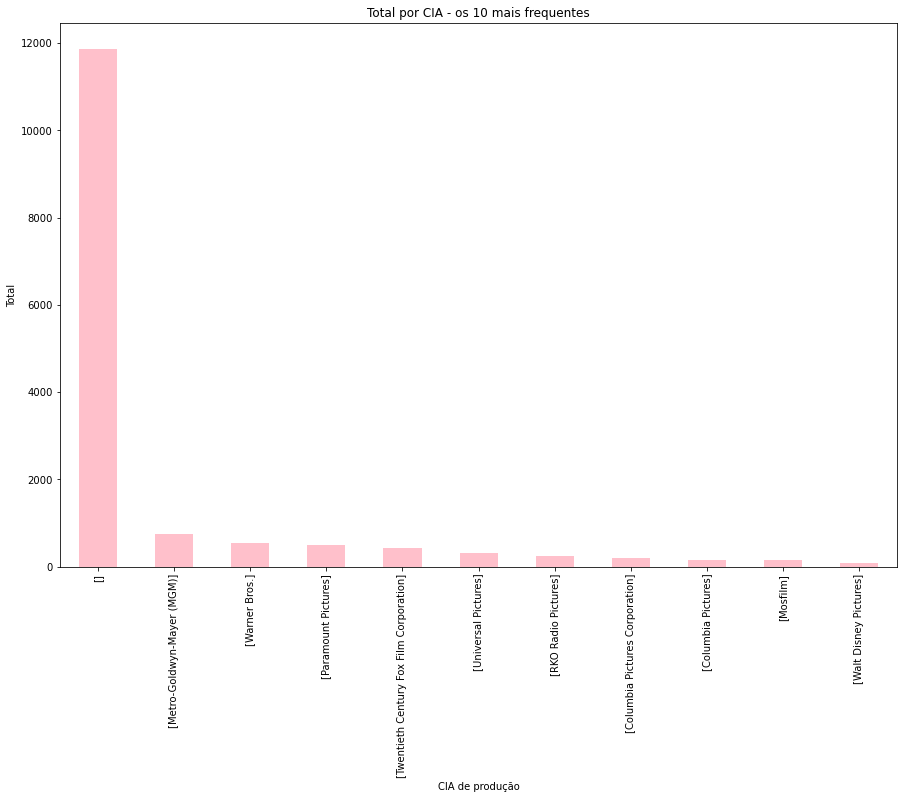

In [1753]:
# Plotando as 10 cia de produção mais frequentes
cia_10_mais.plot.bar(color = "pink")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("CIA de produção")
plt.ylabel("Total")
plt.title("Total por CIA - os 10 mais frequentes")

### TRANSFORMANDO AS 10 CIA MAIS FREQUENTES EM FEATURES

In [1754]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
cia_x = te.fit(df.novo_cia_producao).transform(df.novo_cia_producao)
df_cia = pd.DataFrame(cia_x, columns=te.columns_)

In [1755]:
df_cia.head(3)

,# Andrea Sperling Productions,# Lexyn Productions,'A' Production Committee,(주)로드픽쳐스,(주)로제타시네마,(주)비에이엔터테인먼트,", Flaminia Produzioni Cinematografiche",", Planet Productions",.406 Production,01 Distribution,...,롯데엔터테인먼트,쇼박스(주)미디어플렉스,싸이더스 픽쳐스,씨너스엔터테인먼트(주),영화사 수박,영화사 집,이디오플랜,인벤트 디,타임스토리그룹,프로덕션M
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1756]:
# SELECIONANDO AS 10 MAIS FREQUENTES
df_cia = df_cia[['Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures', 
        'Twentieth Century Fox Film Corporation', 'Universal Pictures', 'RKO Radio Pictures', 
        'Columbia Pictures Corporation', 'Columbia Pictures',
        'Mosfilm', 'Walt Disney Pictures']]

In [1757]:
df_cia.shape

(45430, 10)

In [1758]:
df.shape

(45430, 47)

In [1759]:
# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_cia], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [1760]:
print ('Qtde de colunas após mesclagem:', df.shape)

Qtde de colunas após mesclagem: (45433, 57)


In [1761]:
# validando a transformação
# exemplo: filme: [Dracula: Dead and Loving It] => CIA: ['Columbia Pictures', 'Castle Rock Entertainment', 'Enigma Pictures']
# exemplo: filme: [The Indian in the Cupboard] => CIA: [['Paramount Pictures', 'Columbia Pictures Corporation', 'The Kennedy/Marshall Company']

df[['Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures', 
        'Twentieth Century Fox Film Corporation', 'Universal Pictures', 'RKO Radio Pictures', 
        'Columbia Pictures Corporation', 'Columbia Pictures',
        'Mosfilm', 'Walt Disney Pictures']][(df.titulo == 'Dracula: Dead and Loving It') | (df.titulo == 'The Indian in the Cupboard')]


,Metro-Goldwyn-Mayer (MGM),Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,RKO Radio Pictures,Columbia Pictures Corporation,Columbia Pictures,Mosfilm,Walt Disney Pictures
11,False,False,False,False,False,False,False,True,False,False
59,False,False,True,False,False,False,True,False,False,False


In [1762]:
# Features até agora
df.columns

Index(['index', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'D', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental', 'a', 'm', 'r', 'lingua', 'novo_cia_producao',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures Corporation',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures'],
      dtype='object')

### FEATURE PAIS DE PRODUÇÃO

In [1763]:
df['pais_producao'].head(3)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: pais_producao, dtype: object

In [1764]:
df['pais_producao'].isnull().sum()

3

In [1765]:
# idenficando os registros nulos
select = df['pais_producao'].isnull()
df[select]

,index,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,...,Metro-Goldwyn-Mayer (MGM),Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,RKO Radio Pictures,Columbia Pictures Corporation,Columbia Pictures,Mosfilm,Walt Disney Pictures
19721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
29481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
35561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,False,False


In [1766]:
# exclusão dos registros nulos
df.drop(19721, inplace=True, axis=0)
df.drop(29481, inplace=True, axis=0)
df.drop(35561, inplace=True, axis=0)

In [1767]:
# validando a exclusão
select = df['pais_producao'].isnull()
df[select]

,index,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,...,Metro-Goldwyn-Mayer (MGM),Warner Bros.,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,RKO Radio Pictures,Columbia Pictures Corporation,Columbia Pictures,Mosfilm,Walt Disney Pictures


In [1768]:
# Função para transformar dicionario em uma lista de pais
df['pais_producao'] = df['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
def get_list(x):   
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #print ('names antes if len(names) > 1', names)
        tam = len(names)
        x = []
        if (tam > 1):
            t = 0
            #print ('entrei if')
            while t < tam:
                y = names[t]
                #print ('y', y)
                x.append(y)
                #print ('x', x)
                x.sort()
                #print ('x ordenado', x)
                t = t + 1
        if (tam == 1):            
            x.append(names[0])
            #print ('Unico genero', x)
        return x
        #print ('lista ordenada',x)
    return []
df['pais_producao_ordenados'] = df['pais_producao'].apply(get_list) #O retorno será uma lista com todos os gêneros.

# VALIDANDO TRANSFORMAÇÃO
df[["pais_producao_ordenados", "pais_producao", "titulo_original"]].head(3)

,pais_producao_ordenados,pais_producao,titulo_original
0,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Toy Story
1,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Jumanji
2,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Grumpier Old Men


In [1769]:
# lista dos 10 países mais comuns
pais_15_mais = df.pais_producao_ordenados.value_counts().sort_values(ascending = False).head(15)
pais_15_mais

[United States of America]                    17841
[]                                             6279
[United Kingdom]                               2238
[France]                                       1653
[Japan]                                        1354
[Italy]                                        1030
[Canada]                                        840
[Germany]                                       748
[Russia]                                        735
[India]                                         735
[United Kingdom, United States of America]      624
[Canada, United States of America]              478
[South Korea]                                   432
[Spain]                                         398
[Hong Kong]                                     365
Name: pais_producao_ordenados, dtype: int64

Text(0.5, 1.0, 'Total por paós - os 10 mais frequentes')

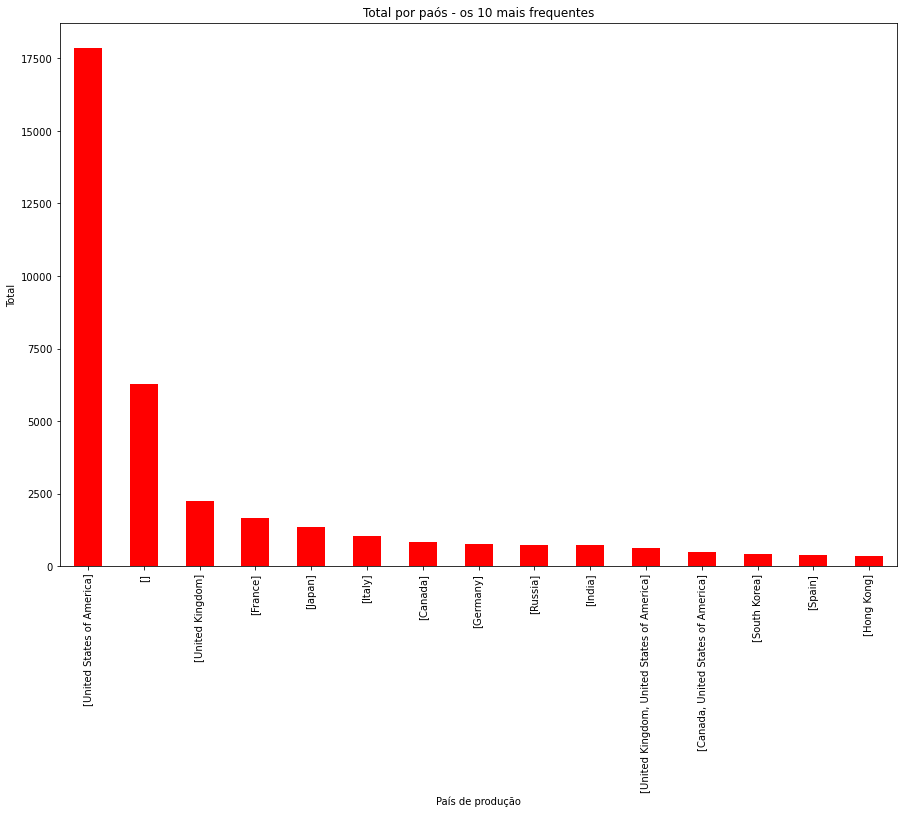

In [1770]:
pais_15_mais.plot.bar(color = "red")

plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=90)

plt.xlabel("País de produção")
plt.ylabel("Total")
plt.title("Total por paós - os 10 mais frequentes")

Comparar a lista de países com os países convertidos para feature

In [1771]:
'''# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = df.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = df.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print ('Lista de país onde os filmes foram produzidos: \n', pais_producao_unicos)
'''

'# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los\ntodos_registros = len(df.novo_pais_producao)        \npais_producao_unicos = [] # lista onde será incluídos os países de produção únicos\nx = 0 \nprint (\'total de registros do dataset: \', todos_registros)\nwhile (x < todos_registros): # enquanto tiver registros no dataset\n    pais = df.novo_pais_producao[x]\n    tam_pais = len(pais)\n    i = z = 0\n    while (i < tam_pais): # enquanto o registro tiver paises de produção\n        cada_pais_registo = df.novo_pais_producao[x][i]\n        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos\n            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos\n            z +=1\n        i += 1        \n    x += 1\n\nprint ("pais_producao_unicos: ", len(pais_producao_unicos))\nprint (\'Lista de país onde os filmes foram produzidos:

In [1772]:
df.pais_producao_ordenados.value_counts().head(15)

[United States of America]                    17841
[]                                             6279
[United Kingdom]                               2238
[France]                                       1653
[Japan]                                        1354
[Italy]                                        1030
[Canada]                                        840
[Germany]                                       748
[Russia]                                        735
[India]                                         735
[United Kingdom, United States of America]      624
[Canada, United States of America]              478
[South Korea]                                   432
[Spain]                                         398
[Hong Kong]                                     365
Name: pais_producao_ordenados, dtype: int64

In [1773]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
pais_producao_x = te.fit(df.pais_producao_ordenados).transform(df.pais_producao_ordenados)
df_novo_pais_producao = pd.DataFrame(pais_producao_x, columns=te.columns_)


In [1774]:
# resetando os índices
df_novo_pais_producao = df_novo_pais_producao.reset_index()
df_novo_pais_producao.head(3)

,index,Afghanistan,Albania,Algeria,Angola,Antarctica,Argentina,Armenia,Aruba,Australia,...,United Arab Emirates,United Kingdom,United States Minor Outlying Islands,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yugoslavia,Zimbabwe
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [1775]:
# SELECIONANDO AS 10 MAIS FREQUENTES
df_novo_pais_producao = df_novo_pais_producao[['United States of America','United Kingdom','France','Japan','Italy','Canada','Germany','Russia','India', 'Canada']]
df_novo_pais_producao.head(3)

,United States of America,United Kingdom,France,Japan,Italy,Canada,Germany,Russia,India,Canada
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False


In [1776]:
df_novo_pais_producao.shape

(45430, 10)

In [1777]:
df.shape

(45430, 58)

In [1778]:


# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo_pais_producao], axis=1)

# copiando o conteúdo do novo dataframe
df = horizontal_stack.copy()

In [1779]:
print ('Qtde de colunas após mesclagem:', df.shape)

Qtde de colunas após mesclagem: (45433, 68)


In [1780]:
df.columns

Index(['index', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'D', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental', 'a', 'm', 'r', 'lingua', 'novo_cia_producao',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures Corporation',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'pais_producao_ordenados', 'United States of America', 'United Kingdom',
       'Franc

In [1781]:
# validando a transformação
# exemplo: filme: [Dracula: Dead and Loving It] => paises: ['France','United States of America'] -> id: 11
# exemplo: filme: [GoldenEye] => paises ['United Kingdom', 'United States of America']-> id => 9


df[['United States of America','United Kingdom','France','Japan','Italy','Canada','Germany','Russia','India', 'Canada']][(df.titulo == 'Dracula: Dead and Loving It') | (df.titulo == 'GoldenEye')]

,United States of America,United Kingdom,France,Japan,Italy,Canada,Canada,Germany,Russia,India,Canada,Canada
9,True,True,False,False,False,False,False,False,False,False,False,False
11,True,False,True,False,False,False,False,False,False,False,False,False


In [1782]:
df.columns

Index(['index', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'generos_ordenados', 'index', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'D', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental', 'a', 'm', 'r', 'lingua', 'novo_cia_producao',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures Corporation',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'pais_producao_ordenados', 'United States of America', 'United Kingdom',
       'Franc

In [1783]:
# a coluna index será excluída
df.drop(['index'],axis = 1, inplace = True)

In [1784]:
'''
# contabilizando a qtde de registros true de cada pais de gravação
lista_pais = df_novo_pais_producao.columns
print (lista_pais)
tam = len(lista_pais)
print ("total de pais", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    pais = lista_pais[x]
    total_pais = sum(df_novo_pais_producao[pais] == True)    
    print ('pais: ', pais, '|',total_pais)
    x += 1
    lista_totais.append (total_pais)

lista_pais_producao = list(zip(lista_totais,lista_pais))

del(lista_pais_producao[0]) # excluindo o valor index

print (lista_pais_producao)
'''

'\n# contabilizando a qtde de registros true de cada pais de gravação\nlista_pais = df_novo_pais_producao.columns\nprint (lista_pais)\ntam = len(lista_pais)\nprint ("total de pais", tam)\nx = 0\nlista_totais = [] # lista para armazenar os valores totais de cada genero\n#print (type (lista_totais))\n\nwhile x < tam:\n    pais = lista_pais[x]\n    total_pais = sum(df_novo_pais_producao[pais] == True)    \n    print (\'pais: \', pais, \'|\',total_pais)\n    x += 1\n    lista_totais.append (total_pais)\n\nlista_pais_producao = list(zip(lista_totais,lista_pais))\n\ndel(lista_pais_producao[0]) # excluindo o valor index\n\nprint (lista_pais_producao)\n'

In [1785]:
'''
# ordenando e revertendo a ordenação
lista_pais_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_pais_producao[0:10]
'''

'\n# ordenando e revertendo a ordenação\nlista_pais_producao.sort(reverse=True)\n\n# obtendo os 10 mais frequentes países\nlista_pais_producao[0:10]\n'

In [1786]:
'''
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_pais_producao[0:10]]
y = [v[0] for v in lista_pais_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 25000)

plt.xticks(rotation=75)

plt.xlabel("País de gravação")
plt.ylabel("Total")
plt.title("Total por país onde os filmes foram gravados")

plt.show()
'''

'\n#plotando os 10 mais frequentes paises de gravação\nx = [v[1] for v in lista_pais_producao[0:10]]\ny = [v[0] for v in lista_pais_producao[0:10]]\n\nplt.bar(x, y)\n\nplt.rcParams[\'figure.figsize\'] = [15, 5]\nplt.ylim(0, 25000)\n\nplt.xticks(rotation=75)\n\nplt.xlabel("País de gravação")\nplt.ylabel("Total")\nplt.title("Total por país onde os filmes foram gravados")\n\nplt.show()\n'

## FEATURE DATA DE LANÇAMENTO

In [1787]:
df.data_lancamento.head(3)

0    1995-10-30
1    1995-12-15
2    1995-12-22
Name: data_lancamento, dtype: object

In [1788]:
df.data_lancamento.describe()

count          45346
unique         17333
top       2008-01-01
freq             136
Name: data_lancamento, dtype: object

In [1789]:
# Separa o ano da data de lançamento e salvar numa nova featue
data = df['data_lancamento'].astype(str) # se o resultado for uma lista das datas do banco
print (data)
ano = [a.split('-')[0] for a in data]
df['ano_lancamento'] = ano

# validando a transformação
df[['data_lancamento','ano_lancamento']].head(2)

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45428           nan
45429    2011-11-17
45430    2003-08-01
45431    1917-10-21
45432    2017-06-09
Name: data_lancamento, Length: 45433, dtype: object


,data_lancamento,ano_lancamento
0,1995-10-30,1995
1,1995-12-15,1995


In [1790]:
df.ano_lancamento.unique()

array(['1995', '1996', '1994', '1997', '1976', '1992', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1974', '1970', '1960', '1955',
       '1959', '1968', '1980', '1988', '1975', '2002', 'nan', '1948',
       '1943', '1950', '1987', '1973', '1956', '1958', '1949', '1972',
       '1953', '1998', '1933', '2010', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1963', '1942', '1941', '1939', '1947',
       '1946', '1945', '1938', '1935', '1936', '1926', '1932', '1979',
       '1971', '1986', '2013', '1978', '1966', '1962', '1983', '1984',
       '1931', '1922', '1999', '1927', '1929', '1930', '1928', '2012',
       '1925', '2000', '1919', '1923', '1920', '1918', '1921', '2001',
       '2011', '1924', '2003', '2004', '1915', '1916', '1917', '2005',
       '2006', '1902', '1903', '2007', '2008', '2009', '1914', '1912',
       '1913', '1898', '1899', '1894', '1909', '1910', '1901', '1893',
       

In [1791]:
# contabilizar a qtde de registro com nan
len(df.ano_lancamento[df.ano_lancamento.isnull()])

0

In [1792]:
ano_lancamento = df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10)
ano_lancamento

ano_lancamento
2014    1973
2015    1904
2013    1887
2012    1721
2011    1666
2016    1604
2009    1585
2010    1501
2008    1470
2007    1319
dtype: int64

Text(0.5, 1.0, 'Os 10 anos de lançamento mais frequentes')

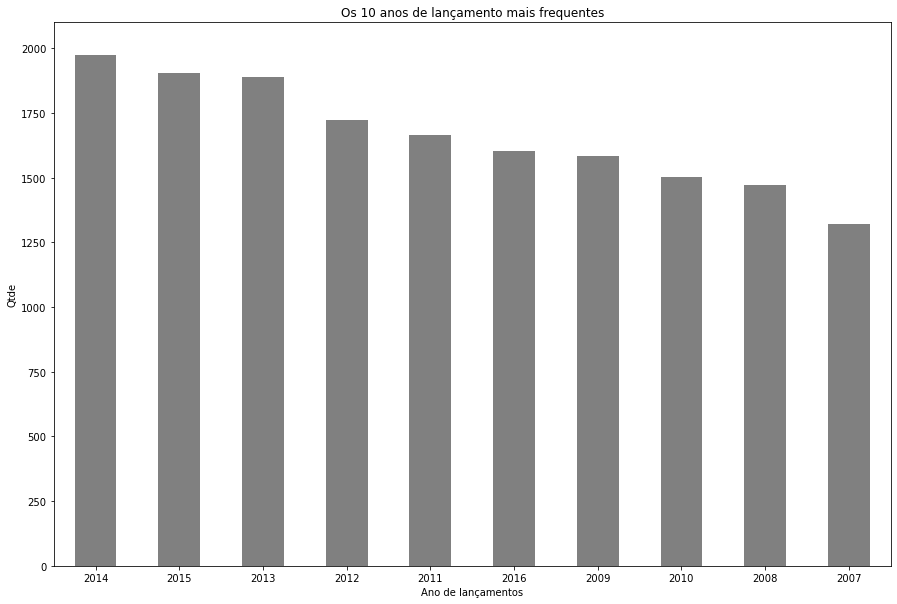

In [1793]:
# visualizando os 10 anos mais frequentes
ano_lancamento.plot.bar(color = 'gray')

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2100)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Ano de lançamentos')
plt.title('Os 10 anos de lançamento mais frequentes')

In [1794]:
## FEATURE RECEITA

In [1795]:
df.receita.head(3)

0    373554033.0
1    262797249.0
2            0.0
Name: receita, dtype: float64

In [1796]:
df.receita.describe()

count    4.543000e+04
mean     1.121288e+07
std      6.435213e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: receita, dtype: float64

In [1797]:
# qtde de registros únicos de receita
len(df.receita.unique())

6864

Conforme observamos, 75% dos filmes não possui valor de receita. A feature não será utilizada na análise/predição

In [1798]:
#Deletando
df.drop('receita', axis=1, inplace = True)

## FEATURE DURACAO

In [1799]:
df.duracao.head(3)


0     81.0
1    104.0
2    101.0
Name: duracao, dtype: float64

In [1800]:
df.duracao.describe()

count    45173.00000
mean        94.12430
std         38.41554
min          0.00000
25%         85.00000
50%         95.00000
75%        107.00000
max       1256.00000
Name: duracao, dtype: float64

In [1801]:
# qtde de registros únicos
len(df.duracao.unique())

354

In [1802]:
# As 10 duração mais frequentes
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.0     2555
0.0      1558
100.0    1470
95.0     1411
93.0     1212
96.0     1104
92.0     1079
94.0     1061
91.0     1057
88.0     1032
dtype: int64

In [1803]:
# média
df['duracao'].mean().round(0)

94.0

In [1804]:
# muitos registros possuem duração zero. Estes casos serão substituidos pela média
df.duracao= df.duracao.replace(0,df['duracao'].mean().round(0))

In [1805]:
# verificando o impacto da atualização dos valores zerados de duração
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
94.0     2619
90.0     2555
100.0    1470
95.0     1411
93.0     1212
96.0     1104
92.0     1079
91.0     1057
88.0     1032
97.0     1027
dtype: int64

Text(0.5, 1.0, 'Duração mais frequentes')

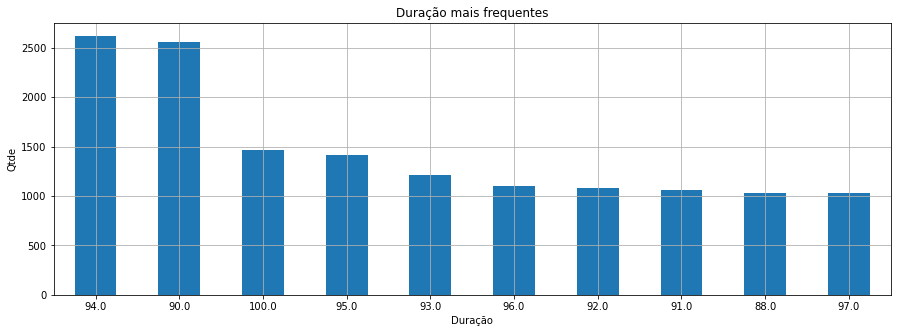

In [1806]:
df.groupby(by='duracao').size().sort_values(ascending = False).head(10).plot.bar()

plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 10]

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Duração')
plt.title('Duração mais frequentes')

## FEATURE IDIOMAS FALADOS (TRADUÇÕES)

In [1807]:
df.idiomas_falados.head(3)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
Name: idiomas_falados, dtype: object

In [1808]:
df.idiomas_falados.describe()

count                                        45430
unique                                        1931
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22381
Name: idiomas_falados, dtype: object

In [1809]:
df.idiomas_falados.isnull().sum()

3

In [1810]:
# identificando os registros nulos
df[df.idiomas_falados.isnull()]

,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,...,United Kingdom,France,Japan,Italy,Canada,Germany,Russia,India,Canada,ano_lancamento
19721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,nan
29481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,nan
35561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,nan


In [1811]:
# Deletando os registro
df.drop(19721, inplace=True, axis=0)
df.drop(29481, inplace=True, axis=0)
df.drop(35561, inplace=True, axis=0)

In [1812]:
# validando a exclusao dos registros nulos
df[df.idiomas_falados.isnull()]

,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,data_lancamento,...,United Kingdom,France,Japan,Italy,Canada,Germany,Russia,India,Canada,ano_lancamento


In [1813]:
# Função para transformar dicionario em uma lista de pais
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
def get_list(x):   
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #print ('names antes if len(names) > 1', names)
        tam = len(names)
        x = []
        if (tam > 1):
            t = 0
            #print ('entrei if')
            while t < tam:
                y = names[t]
                #print ('y', y)
                x.append(y)
                #print ('x', x)
                x.sort()
                #print ('x ordenado', x)
                t = t + 1
        if (tam == 1):            
            x.append(names[0])
            #print ('Unico genero', x)
        if (tam == 0):
            x.append('English') # valor calculado através da moda
        return x
        #print ('lista ordenada',x)
    return []
df['idiomas_falados_ordenados'] = df['idiomas_falados'].apply(get_list) #O retorno será uma lista com todos os gêneros.

# VALIDANDO TRANSFORMAÇÃO
df[["idiomas_falados_ordenados", "idiomas_falados", "titulo_original"]].head(3)

,idiomas_falados_ordenados,idiomas_falados,titulo_original
0,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,"[English, Français]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,[English],"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men


In [ ]:
'''
from ast import literal_eval
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_idiomas_falados'] = df['idiomas_falados'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)
'''

In [1510]:
'''
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['novo_idiomas_falados'][t]) == 0):
        #print ('registro zerado', df.lingua_original[t], df.novo_idiomas_falados[t])
        df['novo_idiomas_falados'][t].append(df.lingua_original[t])
        if df.lingua_original[t] not in lista_idiomas_originais:
            lista_idiomas_originais.append(df.lingua_original[t])
        z = z + 1
    t = t + 1
print ("total de registros atualizados", z)
'''

total de registros 45430


NameError: name 'lista_idiomas_originais' is not defined

In [1814]:
df.idiomas_falados_ordenados.value_counts()

[English]                             26208
[Français]                             1851
[日本語]                                  1287
[Italiano]                             1218
[Español]                               902
                                      ...  
[Deutsch, Français, ქართული]              1
[, English, Italiano, 普通话]                1
[English, हिन्दी, 普通话, 한국어/조선말]           1
[Deutsch, English, Español, Latin]        1
[Français, Srpski, български език]        1
Name: idiomas_falados_ordenados, Length: 1428, dtype: int64

In [1513]:
# resetando os índices
#df = df.reset_index()

In [1514]:
'''
# atualizando os registros zerados
total_registros = len(df)
print ('total de registros', total_registros)
t = z = 0 
while t < total_registros:
    if (len(df['idiomas_falados_ordenados'][t]) == 0):
        df['idiomas_falados_ordenados'][t].append(df.lingua_original[t])
        z = z + 1
    t = t + 1
print ("total de registros atualizados", z)
'''

total de registros 45430
total de registros atualizados 2876


In [1816]:
# Validando se os registros zerados foram atualizados
df.idiomas_falados_ordenados.value_counts().head(20)

[English]              26208
[Français]              1851
[日本語]                   1287
[Italiano]              1218
[Español]                902
[English, Français]      825
[Pусский]                807
[Deutsch]                761
[English, Español]       757
[Deutsch, English]       581
[हिन्दी]                 480
[한국어/조선말]                425
[English, Italiano]      400
[普通话]                    347
[svenska]                311
[No Language]            303
[Português]              275
[suomi]                  273
[Polski]                 213
[English, Pусский]       211
Name: idiomas_falados_ordenados, dtype: int64

Text(0.5, 1.0, 'Os 10 idiomas mais frequentes')

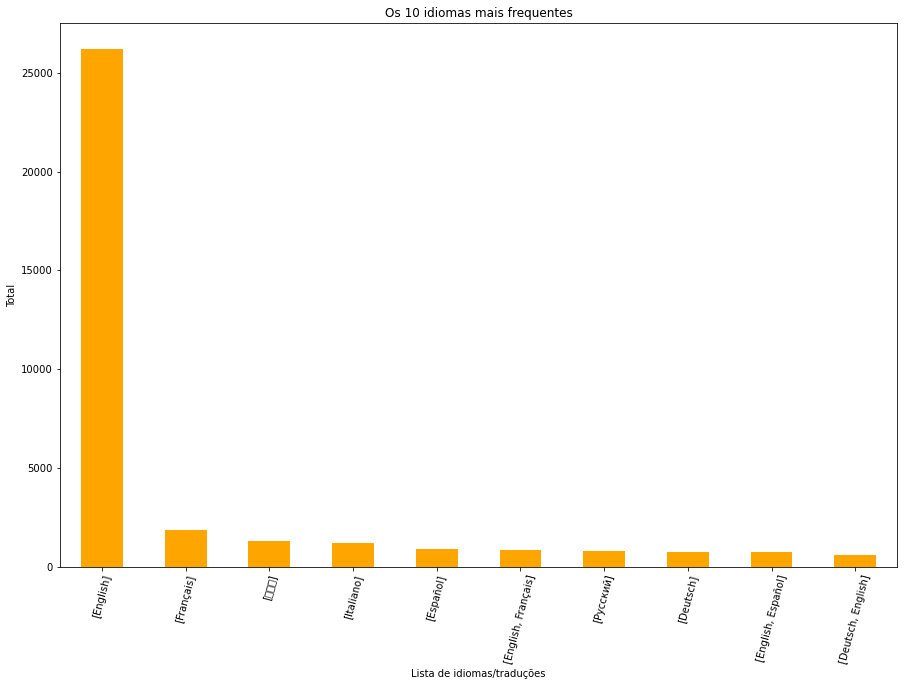

In [1818]:
# plotando os generos
df.idiomas_falados_ordenados.value_counts().head(10).plot.bar(color='orange')

plt.xticks(rotation=75)
plt.xlabel("Lista de idiomas/traduções")
plt.ylabel("Total")
plt.title("Os 10 idiomas mais frequentes")

In [1820]:
# resetando os índices
df = df.reset_index()

In [1821]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(df.idiomas_falados_ordenados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = df.idiomas_falados_ordenados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = df.idiomas_falados_ordenados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  45430
idiomas_falados_unicos:  73
['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'Magyar', 'Italiano', 'shqip', '한국어/조선말', 'فارسی', 'Dansk', '', '日本語', 'العربية', 'Bosanski', 'Hrvatski', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'Srpski', 'বাংলা', 'Wolof', 'Cymraeg', 'ภาษาไทย', 'Latviešu', 'Kiswahili', 'български език', 'ελληνικά', 'Türkçe', 'suomi', 'Esperanto', 'Український', 'ქართული', 'Bokmål', 'No Language', 'euskera', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'پښتو', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'Fulfulde', 'ozbek', 'Hausa']


In [ ]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
idiomas_falados_x = te.fit(df['novo_idiomas_falados']).transform(df['novo_idiomas_falados'])
df_novo_idiomas_falados = pd.DataFrame(idiomas_falados_x, columns=te.columns_)

# resetando os índices
df_novo_idiomas_falados = df_novo_idiomas_falados.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df['novo_idiomas_falados']], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [ ]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_idiomas_falados.drop(['index'],axis = 1, inplace = True)

In [ ]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_idiomas = df_novo_idiomas_falados.columns
print (lista_idiomas)
tam = len(lista_idiomas)
print ("total de idiomas", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada idioma
#print (type (lista_totais))

while x < tam:
    idiomas = lista_idiomas[x]
    total_idiomas = sum(df_novo_idiomas_falados[idiomas] == True)    
    print ('idiomas: ', idiomas, '|',total_idiomas)
    x += 1
    lista_totais.append (total_idiomas)

lista_total_idiomas_producao = list(zip(lista_totais,lista_idiomas))

del(lista_total_idiomas_producao[0]) # excluindo o valor index

print (lista_total_idiomas_producao)

In [ ]:
# Deletrando os registros com valor '?????' e '??????'
del(lista_total_idiomas_producao[0:2])

# validando a exclusão
lista_total_idiomas_producao

In [ ]:
# ordenando e revertendo a ordenação
lista_total_idiomas_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_total_idiomas_producao[0:10]

In [ ]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_total_idiomas_producao[0:10]]
y = [v[0] for v in lista_total_idiomas_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 30000)

plt.xticks(rotation=75)

plt.xlabel("Idiomas")
plt.ylabel("Total")
plt.title("Total de idiomas disponíveis no filmes")

plt.show()

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*